<a href="https://colab.research.google.com/github/williamosherson/hackathon/blob/main/hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
thing = pd.read_csv('/content/drive/MyDrive/Hackathon 2025/node_data.csv')

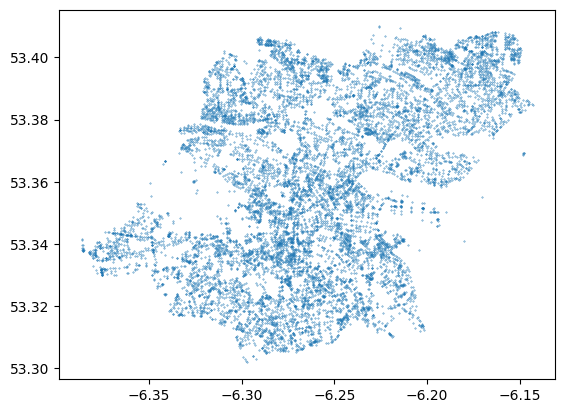

In [18]:
plt.scatter(np.array(thing['x']),np.array(thing['y']),s=0.1)

In [19]:
adj_matrix = np.load('/content/drive/MyDrive/Hackathon 2025/adj_matrix.npy')

In [20]:
adj_matrix.shape

(11565, 11565)

In [21]:
np.sum((adj_matrix.T - adj_matrix)**2)

np.float64(4170.0)

In [22]:
edges = pd.read_csv('/content/drive/MyDrive/Hackathon 2025/edges_data.csv')
nodes = pd.read_csv('/content/drive/MyDrive/Hackathon 2025/node_data.csv')


In [23]:
for i, maxspeed in enumerate(edges['maxspeed']):
    if isinstance(maxspeed,float):
      maxspeed=31
      edges.loc[edges.index[i], 'maxspeed'] = maxspeed
    if isinstance(maxspeed, str) and '[' in maxspeed:
          # Convert the string representation of list to actual list
          speed_list = eval(maxspeed)
          # Calculate the average
          sum = 0
          for number in eval(maxspeed):
            sum +=eval(number)
          meanmaxspeed = sum/len(eval(maxspeed))
          # Update the value in the DataFrame using .loc
          edges.loc[edges.index[i], 'maxspeed'] = meanmaxspeed



In [24]:

edges['maxspeed'] = edges['maxspeed'].astype(float)

In [25]:
edges['times'] = edges['length']/edges['maxspeed']


In [26]:
nodes

,osmid,y,x,street_count,junction,ref,highway,railway,geometry
0,389279,53.345341,-6.267631,3,NaN,NaN,NaN,NaN,POINT (-6.2676306 53.3453413)
1,389281,53.339589,-6.265864,4,NaN,NaN,NaN,NaN,POINT (-6.2658639 53.3395894)
2,389292,53.348280,-6.254945,4,yes,J41,NaN,NaN,POINT (-6.2549447 53.3482797)
3,389302,53.340196,-6.272256,3,NaN,NaN,NaN,NaN,POINT (-6.2722556 53.3401961)
4,389303,53.339365,-6.272570,3,NaN,NaN,NaN,NaN,POINT (-6.2725703 53.3393653)
...,...,...,...,...,...,...,...,...,...
11560,13013917422,53.334421,-6.243880,3,NaN,NaN,NaN,NaN,POINT (-6.2438802 53.3344211)
11561,13042760002,53.363194,-6.314448,3,NaN,NaN,NaN,NaN,POINT (-6.3144477 53.3631943)
11562,13042760003,53.363134,-6.314539,3,NaN,NaN,NaN,NaN,POINT (-6.3145391 53.363134)
11563,13051535633,53.367809,-6.276098,1,NaN,NaN,turning_circle,NaN,POINT (-6.2760979 53.3678092)


In [27]:
edges

,u,v,key,osmid,highway,lanes,maxspeed,name,oneway,ref,reversed,length,geometry,access,tunnel,bridge,width,junction,est_width,times
0,389279,1396858852,0,"[1288830596, 292236197, 1179644327, 1179644328...",secondary,2,40.0,Essex Quay,True,R148,False,158.294118,"LINESTRING (-6.2676306 53.3453413, -6.2677528 ...",NaN,NaN,NaN,NaN,NaN,NaN,3.957353
1,389281,26165090,0,14039949,unclassified,NaN,30.0,York Street,True,NaN,False,108.266539,"LINESTRING (-6.2658639 53.3395894, -6.2657387 ...",NaN,NaN,NaN,NaN,NaN,NaN,3.608885
2,389281,135109542,0,532427444,secondary,3,30.0,Aungier Street,False,R114,False,100.237245,"LINESTRING (-6.2658639 53.3395894, -6.2658319 ...",NaN,NaN,NaN,NaN,NaN,NaN,3.341241
3,389281,2384200130,0,532427444,secondary,3,30.0,Aungier Street,False,R114,True,118.188046,"LINESTRING (-6.2658639 53.3395894, -6.2659031 ...",NaN,NaN,NaN,NaN,NaN,NaN,3.939602
4,389292,3594514232,0,"[506780985, 3789703]",secondary,4,50.0,Beresford Place,True,R105,False,42.481342,"LINESTRING (-6.2549447 53.3482797, -6.2549462 ...",NaN,NaN,NaN,NaN,NaN,NaN,0.849627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26724,13042760002,11675734,0,1419362186,secondary,2,50.0,Blackhorse Avenue,False,R806,False,25.770704,"LINESTRING (-6.3144477 53.3631943, -6.3143639 ...",NaN,NaN,NaN,NaN,NaN,NaN,0.515414
26725,13042760003,12428373,0,7989948,unclassified,1,30.0,NaN,False,NaN,True,27.929939,"LINESTRING (-6.3145391 53.363134, -6.3146157 5...",NaN,NaN,NaN,NaN,NaN,NaN,0.930998
26726,13042760003,13042760002,0,1419350433,unclassified,NaN,30.0,NaN,True,NaN,False,9.205259,"LINESTRING (-6.3145391 53.363134, -6.3145135 5...",NaN,NaN,NaN,NaN,NaN,NaN,0.306842
26727,13051535633,610303883,0,"[1420323200, 47984842]",residential,2,30.0,Tower View Cottages,False,NaN,"[False, True]",129.728240,"LINESTRING (-6.2760979 53.3678092, -6.2760781 ...",NaN,NaN,NaN,NaN,NaN,NaN,4.324275


In [29]:
osmids = nodes['osmid']

In [30]:
indextoosmid=osmids.to_dict()
osmidtoindex = inverted_dict = {value: key for key, value in indextoosmid.items()}

In [31]:
edge_dict = {(row['u'], row['v']): row['times'] for _, row in edges.iterrows()}

In [37]:
adjacencymatrix = np.zeros((11565,11565))
for start_osmid in nodes['osmid']:
  i = osmidtoindex[start_osmid]
  for end_osmid in edges[edges['u'] == start_osmid]['v']:
    j = osmidtoindex[end_osmid]
    adjacencymatrix[i,j] = 1/edge_dict[(start_osmid,end_osmid)]